In [10]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid

import scienceplots

plt.style.use(['science', 'notebook'])

count    4001.000000
mean        0.217492
std         0.030768
min        -0.034150
25%         0.202130
50%         0.222604
75%         0.238803
max         0.291058
Name: dU, dtype: float64

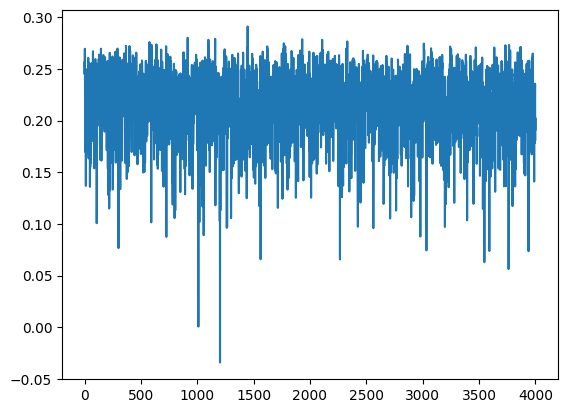

In [2]:
dfs = [pd.read_csv(f'./umbrella_test/ti_energy.{i}.log', delim_whitespace=True) for i in range(1, 50)]
dfs[0].head()
plt.plot(dfs[0]['dU'])
dfs[0]['dU'].describe()

(array([-0.21701257, -0.21701254, -0.21525378, -0.21464904, -0.21442679,
        -0.21352123, -0.21239151, -0.21082532, -0.2098402 , -0.20879314,
        -0.20721169, -0.20565173, -0.20445796, -0.20358977, -0.20073281,
        -0.20133808, -0.1975283 , -0.19718125, -0.19232443, -0.19175794,
        -0.19040274, -0.18865491, -0.18486562, -0.18067986, -0.17961389,
        -0.17707151, -0.17353366, -0.16837848, -0.16681062, -0.16513193,
        -0.15641125, -0.15010092, -0.14796445, -0.14003055, -0.13328437,
        -0.12683636, -0.11644264, -0.10519099, -0.09469346, -0.07797566,
        -0.06246485, -0.04275732, -0.01504538,  0.01915362,  0.06095228,
         0.12132514,  0.22628726,  0.40595861,  0.76606277]),
 -5.680101795598663)

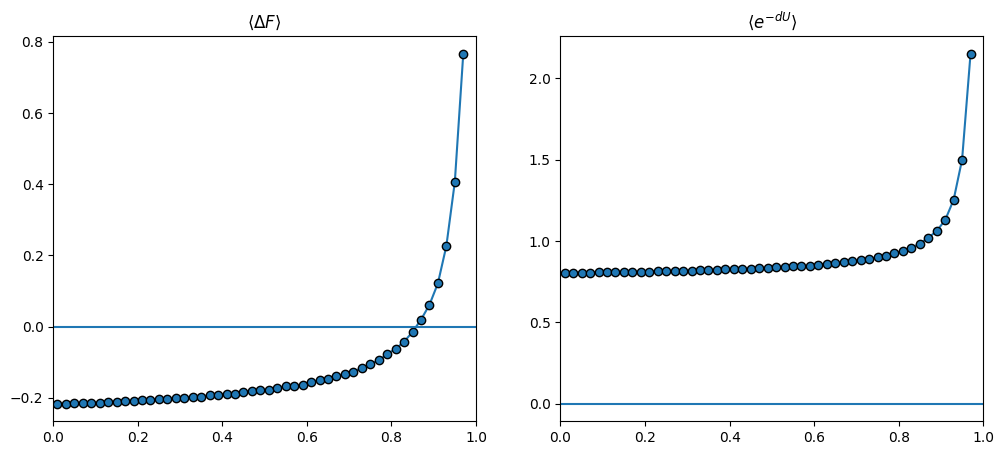

In [20]:
dU_mean = np.array([x['dU'].mean() for x in dfs])
e_dU_mean = np.array([np.exp( -x['dU']) for x in dfs]).mean(axis=1)
e_dU_mean_log = np.log(e_dU_mean)
n_steps = 50
X = np.linspace(1 / n_steps / 2, 1 - 1 / n_steps / 2, n_steps)[:49]

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title(r'$\langle \Delta F \rangle$')
axs[0].plot(X, e_dU_mean_log, marker='o', markeredgecolor='k')
axs[0].hlines(0, 0, 1)
axs[0].set_xlim([0, 1])

axs[1].set_title(r'$\langle e ^ {-dU} \rangle$')
axs[1].plot(X, e_dU_mean, marker='o', markeredgecolor='k')
axs[1].hlines(0, 0, 1)
axs[1].set_xlim([0, 1])
e_dU_mean_log, e_dU_mean_log.sum()

count    4001.000000
mean       -0.168109
std         0.329398
min        -1.948876
25%        -0.144177
50%        -0.011725
75%        -0.000234
max         2.067936
Name: dU/dlambda, dtype: float64

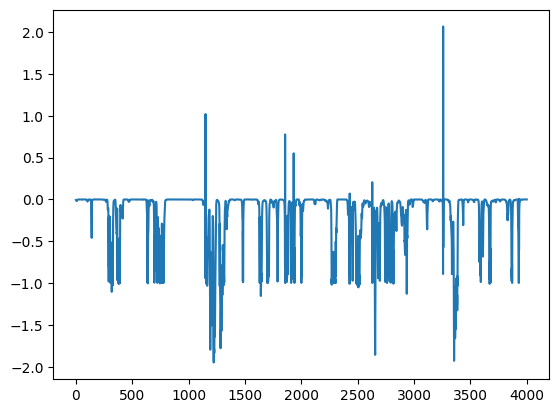

In [6]:
dfs = [pd.read_csv(f'./vap_T0_8/ti_energy.{i}.log', delim_whitespace=True) for i in range(1, 51)]
plt.plot(dfs[0]['dU/dlambda'])
dfs[0]['dU/dlambda'].describe()

In [7]:
"""

variable k equal 1
label create_lambda
  variable theta equal (2*v_k-1)*v_pi/(2*v_n)
  variable lambda_val equal 0.5*(1+cos(v_theta))
  variable lambda${k} equal ${lambda_val}
  variable k equal ${k}+1
  if "${k} <= ${n}" then "jump SELF create_lambda"

"""
n_steps = 50
X = np.array([(1 + np.cos((2 * k - 1) * np.pi /(2 * n_steps))) / 2 for k in range(1, n_steps+1)])
  
  

-0.07916257429564344

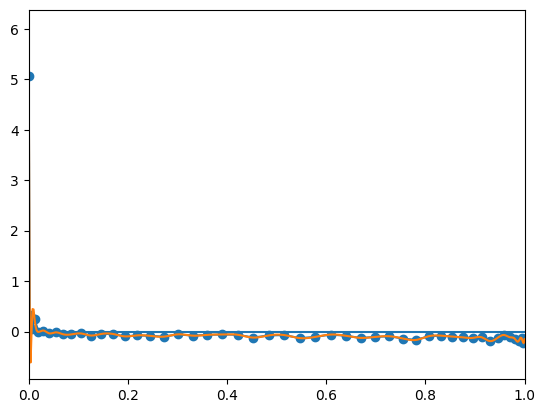

In [8]:
means = np.array([x['dU/dlambda'].mean() for x in dfs])
n_steps = 50
plt.plot(X, means, marker='o')
plt.hlines(0, 0, 1)
plt.xlim([0, 1])
cs = CubicSpline(X[::-1], means[::-1])

grid = np.linspace(0, 1, 500)
plt.plot(grid, cs(grid))
np.trapz(cs(grid), grid)

-0.07916257429564344

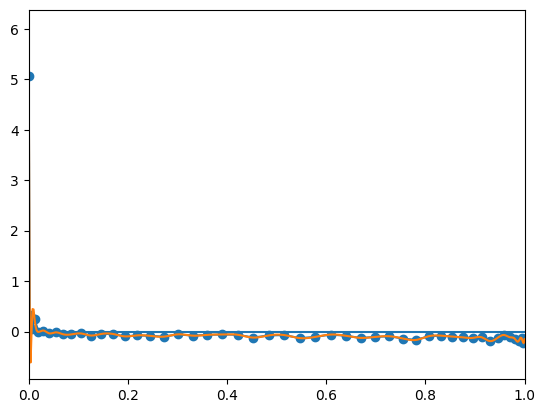

In [9]:
means = np.array([x['dU/dlambda'].mean() for x in dfs])
n_steps = 50
plt.plot(X, means, marker='o')
plt.hlines(0, 0, 1)
plt.xlim([0, 1])
cs = CubicSpline(X[::-1], means[::-1])

grid = np.linspace(0, 1, 500)
plt.plot(grid, cs(grid))
np.trapz(cs(grid), grid)

In [10]:
from numpy.polynomial.chebyshev import chebgauss

n = 50
x_cheb, w_cheb = chebgauss(n)  # x in [-1,1]
x_cheb = 0.5 * (x_cheb + 1)    # преобразование на [0,1]
w_cheb = 0.5 * w_cheb          # учёт масштаба при замене переменной

mu = np.dot(w_cheb, means)
mu

0.04364786600189875

-0.07868298046967126

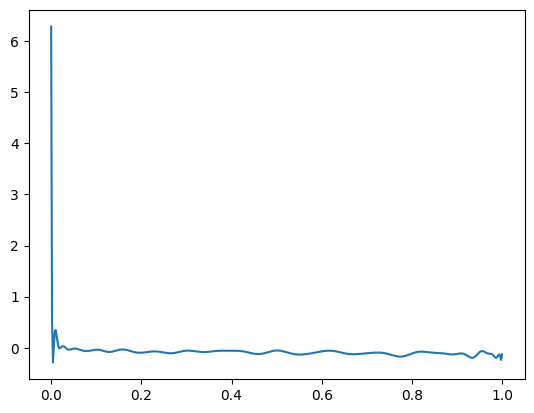

In [20]:
from scipy.interpolate import BarycentricInterpolator

interpolator = BarycentricInterpolator(X, means)
grid = np.linspace(0, 1, 500)
plt.plot(grid, interpolator(grid))
np.trapz(interpolator(grid), grid)


-0.0788774153658866

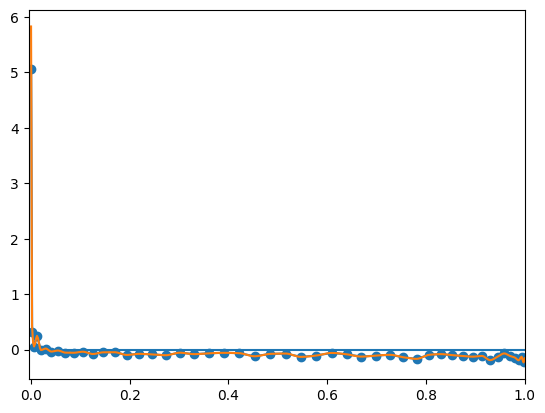

In [18]:
from scipy.interpolate import PchipInterpolator

cs = PchipInterpolator(X[::-1], means)
grid = np.linspace(0, 1, 500)
plt.hlines(0, 0, 1)
plt.xlim([-0.005, 1])
plt.plot(X, means, marker='o')
plt.plot(grid, cs(grid)[::-1])
mu = np.trapz(cs(grid)[::-1], grid)
mu

In [4]:
from scipy.interpolate import PchipInterpolator
T_arr = np.array([0.8, 0.8125, 0.825, 0.85, 0.8625, 0.875, 0.9, 0.9250, 0.9375, 0.9500, 0.9750, 0.9875, 1.0000, 1.0250, 1.0375, 1.0500, 1.0750, 1.0875, 1.1000])
T_arr = T_arr[::3]
n_steps = 50
X = np.array([(1 + np.cos((2 * k - 1) * np.pi /(2 * n_steps))) / 2 for k in range(1, n_steps+1)])
T_arr

array([0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ])

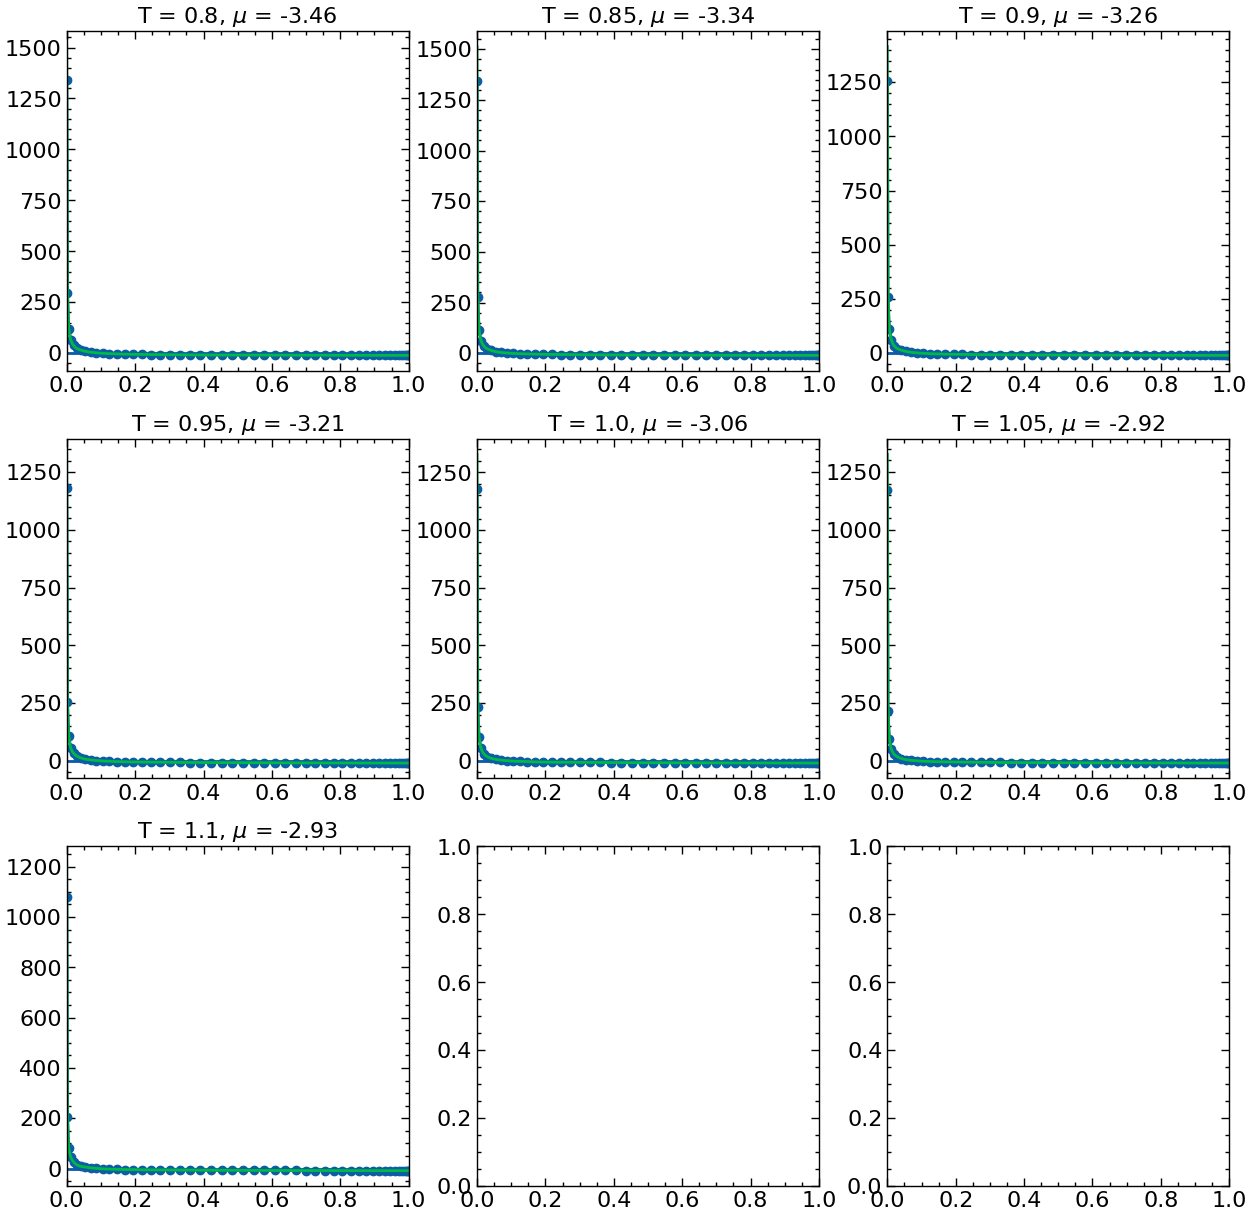

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
mu_liq = []
for i, T in enumerate(T_arr):
    dfs = [pd.read_csv(f'./liq_T{T:.2f}/ti_energy.{i}.log', delim_whitespace=True) for i in range(1, 51)]
    means = np.array([x['dU/dlambda'].mean() for x in dfs])
    n_steps = 50
    
    ax = axs[i // 3, i % 3]
    ax.plot(X, means, marker='o')
    ax.hlines(0, 0, 1)
    ax.set_xlim([0, 1])
    # cs = CubicSpline(X[::-1], means[::-1])
    cs = PchipInterpolator(X[::-1], means)
    grid = np.linspace(0, 1, 500)
    ax.plot(grid, cs(grid)[::-1])
    # ax.set_yscale('log')
    mu = np.trapz(cs(grid), grid)
    mu_liq.append(mu)
    ax.set_title(f'T = {T}, $\mu$ = {mu:.2f}')
    
    
plt.savefig('./images/mus_liq.png')
    

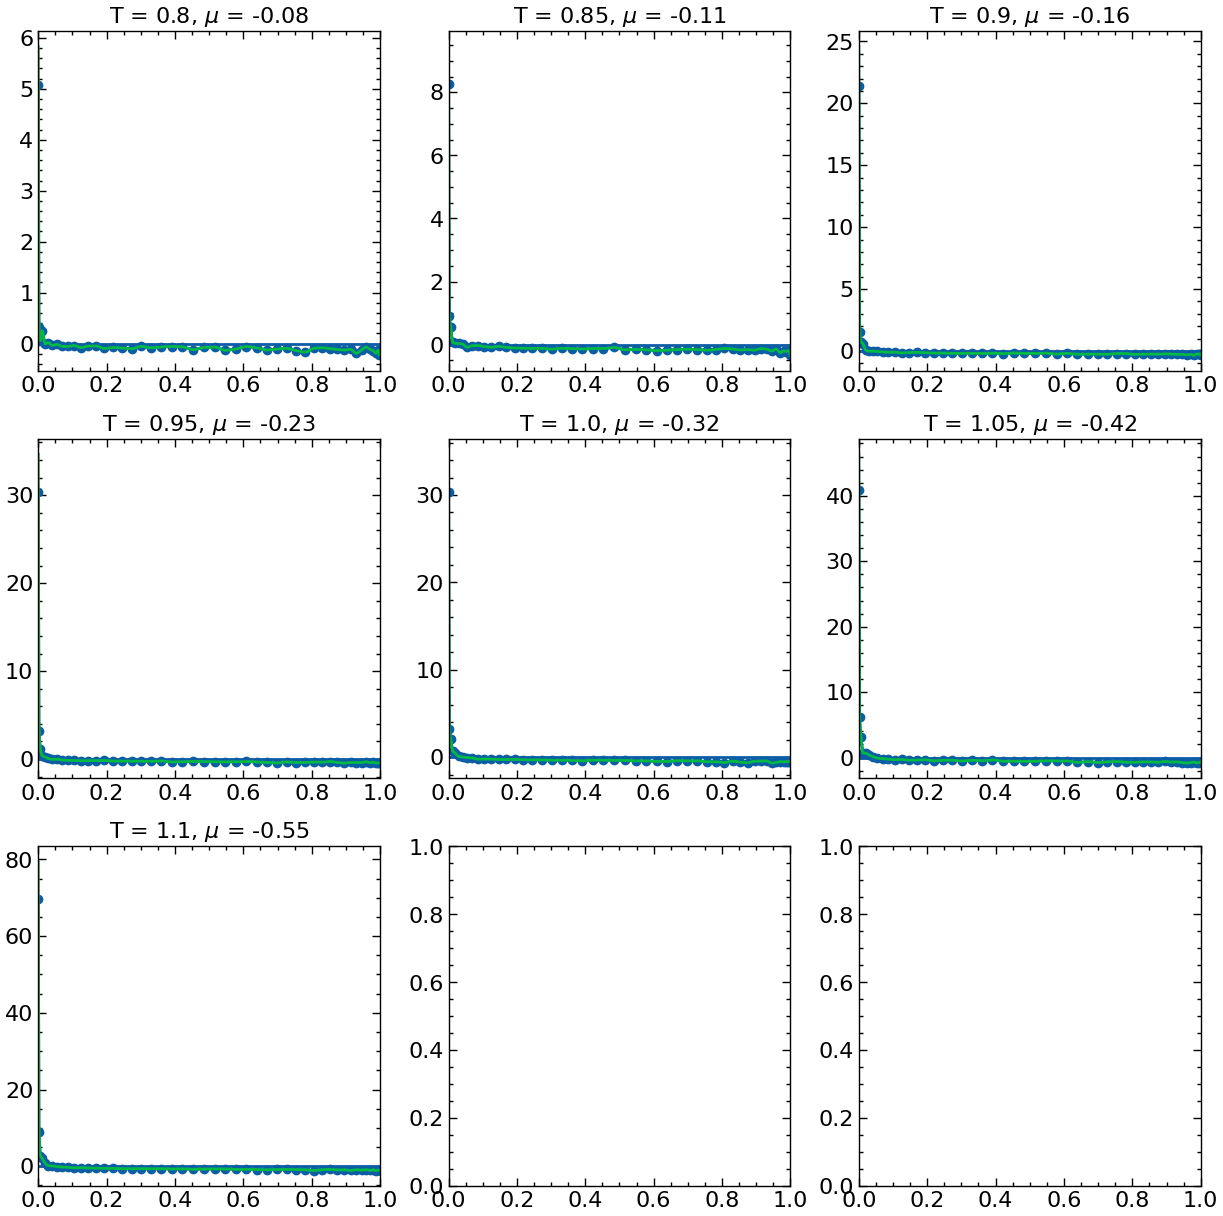

In [18]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
mu_gas = []
for i, T in enumerate(T_arr):
    
    dfs = [pd.read_csv(f'./gas_T{T:.2f}/ti_energy.{i}.log', delim_whitespace=True) for i in range(1, 51)]
    means = np.array([x['dU/dlambda'].mean() for x in dfs])
    n_steps = 50
    
    ax = axs[i // 3, i % 3]
    ax.plot(X, means, marker='o')
    cs = PchipInterpolator(X[::-1], means)
    ax.hlines(0, 0, 1)
    ax.set_xlim([0, 1])
    # cs = CubicSpline(X[::-1], means[::-1])
    
    grid = np.linspace(0, 1, 500)
    ax.plot(grid, cs(grid)[::-1])
    mu = np.trapz(cs(grid), grid)
    mu_gas.append(mu)
    ax.set_title(f'T = {T}, $\mu$ = {mu:.2f}')
    
plt.savefig('./images/mus_gas')
    
    

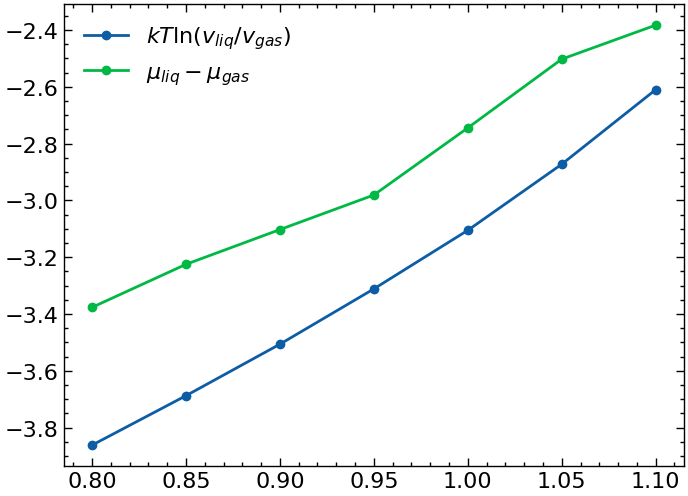

In [19]:
v_liq = np.array([1.25052, 1.28792, 1.32795, 1.37321, 1.42548, 1.48428, 1.55591])
v_gas = np.array([156.08541, 98.60187, 65.31139, 44.82296, 31.80095, 22.88440, 16.68622])

# pd.DataFrame({'T': T_arr, 'd_liq': 1/v_liq, 'd_gas': 1/v_gas})
plt.plot(T_arr, T_arr * np.log(v_liq / v_gas), marker='o', label='$kT \ln (v_{liq} / v_{gas})$')
plt.plot(T_arr, np.array(mu_liq)- np.array(mu_gas) , marker='o', label='$\mu_{liq} - \mu_{gas}$')
plt.legend();

plt.savefig('./images/mu_dif.png')
